# **FINAL SUBMISSION :Intro to AI and Machine Learning (M505B)**


---


# *Name*: Ishak Hafdallah

# *GH Number*: GH1024559



---




# ***PROBLEM STATEMENT:***


I work as a data scientist, at Cardekho, where I have access to their data for optimizing the pricing strategy when selling vehicles

I need to formulate this task as a machine learning model using **supervised** learning for predicting the selling prices of vehicles accurately

Setting up the prices is important for maximizing profit and also to stay competitive in this market of vehicles.By addressing this challenge the company aims to:

>Increase revenue by setting prices based on factors that impact vehicle pricing

>Enhance customer satisfaction by offering market appropriate prices, for vehicles

>Improve inventory management by effectively pricing vehicles resulting in increased sales efficiency

# *Problem Formulation*

>In this scenario we're looking at it as a **Regression task**. The aim is to estimate how much vehicles could be sold for by considering factors

>Factors, like the year of manufacture, mileage, fuel and transmission type, ownership detail, mileage efficiency, engine size, power output, torque capacity and seating capacity will help the training of machine learning models

>The main focus and the target variable will be, on determining the **Selling Price** of the cars




# *Machine Learning Pipeline*:

The end-to-end pipeline will include the following steps:

> Data Collection and Preprocessing


> Data Exploration



> Feature Engineering


> Model Training   


> Model Assessment



# ***DATA COLLECTION AND PREPROCESSING***

This dataset shares some information about used vehicles listed on [Cardekho](www.cardekho.com)

The dataset was shared by following link: [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv)



**Import the libraries and the dataset**

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn
import pandas as pd
import matplotlib.pyplot as p
import seaborn as sns
import numpy as np
import missingno as msno
import plotly.express as px
import tabulate



*   Here I read the dataset file and made a copy from it
*   Then I checked the number of columns/rows then I showed the first 5 rows



In [2]:
cars = pd.read_csv('Car details v3.csv')
df=cars.copy()
print("The number of row is {0}, and the columns is {1}".format(df.shape[0], df.shape[1]))
print("First 5 rows of the dataset:")
df.head()

The number of row is 8128, and the columns is 13
First 5 rows of the dataset:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0



At first glance looking at the dataset I notice that

*   The columns (mileage,engine, max_power, torque and seats) has some Null Values
* there's 1 Float ,3 Integers and 9 Objects
* the dataset has a size of 825.6+ KB




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Here i remove all the duplicates from the dataset before train and test to avoid the data leakage

In [4]:
df.drop_duplicates(inplace=True)
print("\nNumber of duplicates records:")
print( df.duplicated().sum())


Number of duplicates records:
0


**Create a new feature for the brand name**

i notice that in the dataset the name of the vehicle has all the reference name (brand and model), i through it would be better if i had a new column that has only the brand name

In [5]:
df["car_brand_name"] = df["name"].str.extract('([^\\s]+)')
df["car_brand_name"] = df["car_brand_name"].astype("category")


**Remove the units from some features**

I notice that the columns(mileage, engine, and max_power)contain numbers with units beside them, in this case it will make it harder for us in the data exploration because it's a string instead of an integer




In [6]:
df["engine"] = df["engine"].str.extract(r'([^\s]+)').astype("float")
df["mileage"] = df["mileage"].str.extract(r'([^\s]+)').astype("float")

df["max_power"] = df["max_power"].str.extract(r'([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

**Change the selling price from indian rouble to Euro**

i notice that the price of the vehicle is in rouble hindi, so to make it familiar with me i have to make it with euro

In [7]:
df['selling_price'] = df['selling_price'] * 0.0111
df['selling_price'] = df['selling_price'].astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_brand_name
0,Maruti Swift Dzire VDI,2014,4995,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,4107,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,1753,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,2497,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,1443,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


**Handel the missing Values**

Here i illustrate the distribution of the content so i can see where the missing value are

<Axes: >

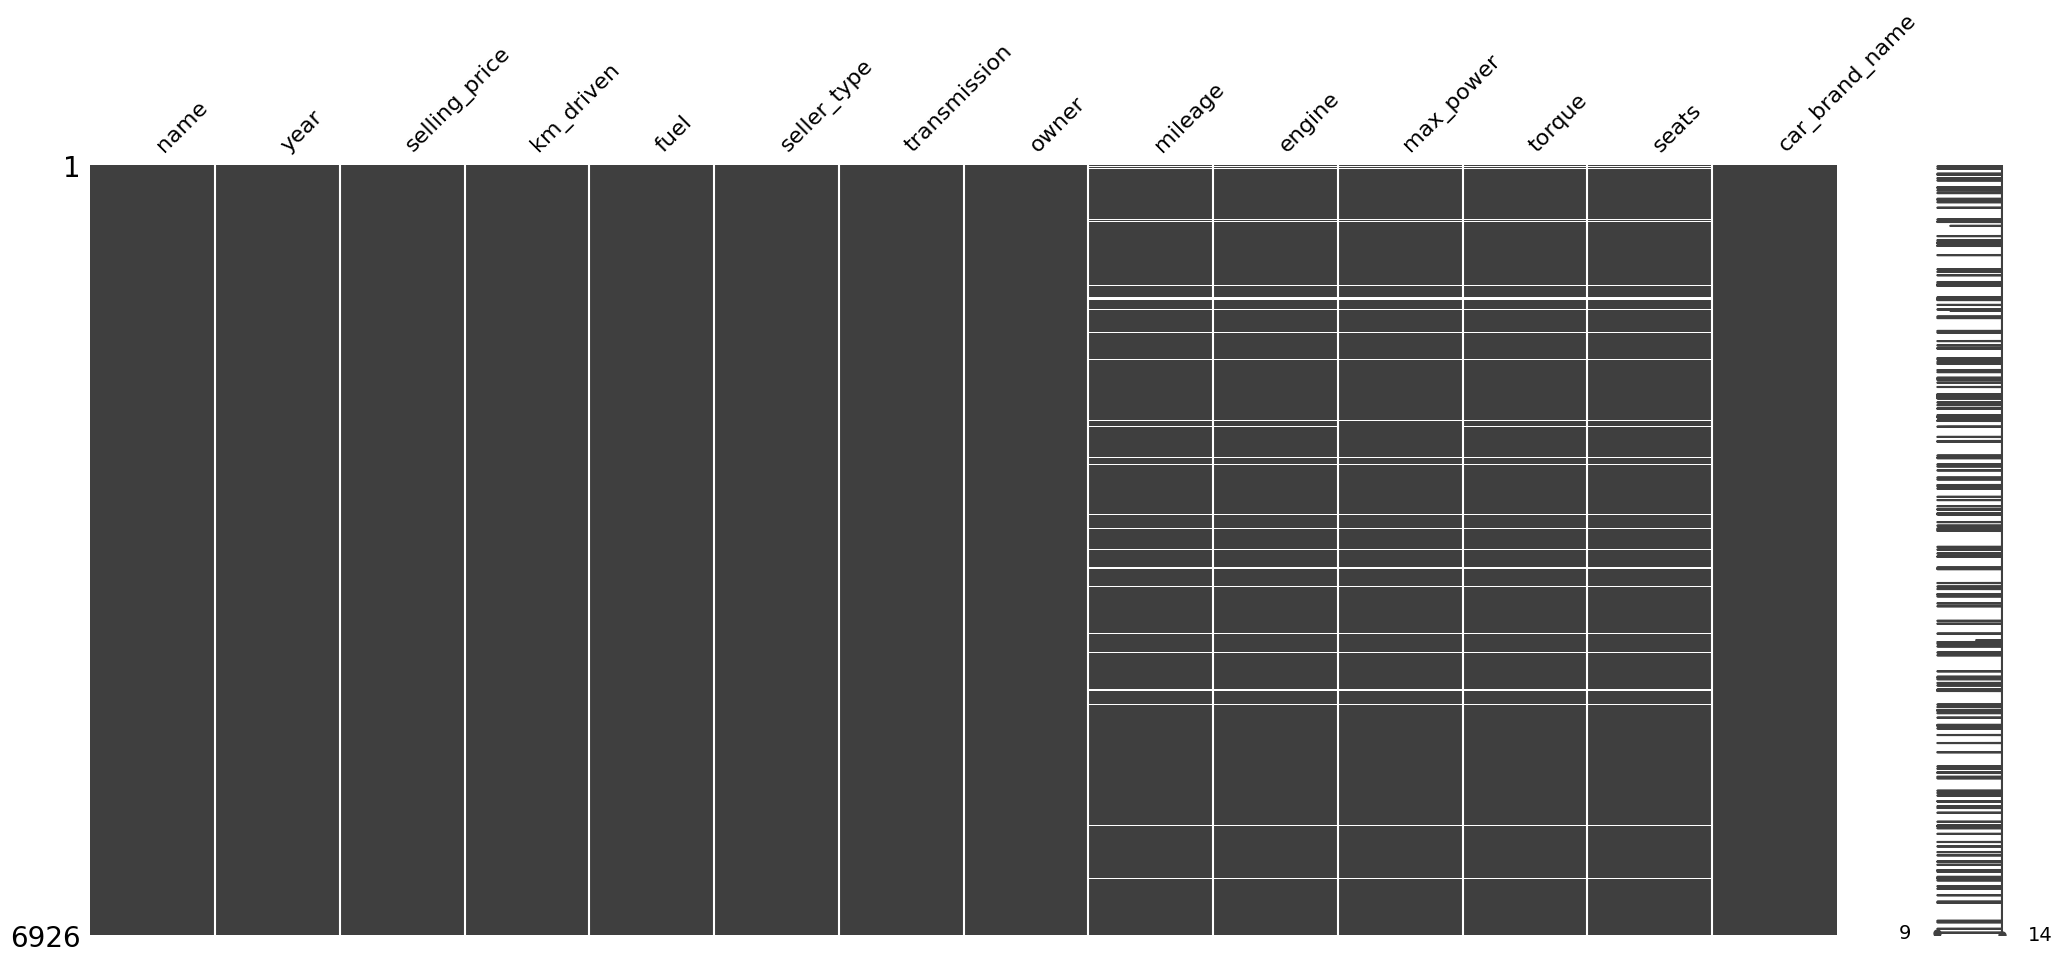

In [8]:
msno.matrix(df)

Here I filled the missing values of the columns(mileage, engine, max_power, seats) with the average number of that column

and I deleted the lines that have a missing value of torque, because it is a string and has no average value

In [9]:
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())
df['seats'] = df['seats'].fillna(df['seats'].median())
df.dropna(subset=['torque'], inplace=True)


In [10]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
car_brand_name    0
dtype: int64


**Split the data into Test and Train **


*   First I defined the features and target variable
*   Split the data( train and test sets)




In [11]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5373, 13) (5373,)
Testing set shape: (1344, 13) (1344,)


Here i Convert the training and testing sets into DataFrames so i can use df_train the the data exploration

In [12]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (5373, 14)
Testing set shape: (1344, 14)


# ***DATA EXPLORATION***

**Check the Correlation Between Features**



*   The selling price has a high correlation with the maximum power of the vehicle, means that when even the maximum power of the car is high the price is usually also high
*   The price of the car will also depend sometimes on the year of construction and the engine of the vehicle, they both have a correlation equal to approximately 0.42



In [13]:
numeric = df_train.select_dtypes(include=['float64', 'int64'])
correlations = numeric.corr()
correlations

,year,km_driven,mileage,engine,max_power,seats,selling_price
year,1.000000,-0.397053,0.374914,-0.027205,0.155944,0.021498,0.421622
km_driven,-0.397053,1.000000,-0.195393,0.250246,0.027588,0.205487,-0.167183
mileage,0.374914,-0.195393,1.000000,-0.579755,-0.376414,-0.467208,-0.105977
engine,-0.027205,0.250246,-0.579755,1.000000,0.677673,0.664831,0.434310
max_power,0.155944,0.027588,-0.376414,0.677673,1.000000,0.246361,0.687037
seats,0.021498,0.205487,-0.467208,0.664831,0.246361,1.000000,0.150790
selling_price,0.421622,-0.167183,-0.105977,0.434310,0.687037,0.150790,1.000000


**Check the summary statistics**



* The data covers the period, from 1994 to 2020 with vehicles ranging from 2011 to 2017. This suggests that the dataset mainly consists of recent vehicles
*  On average cars are sold for, around 5889.83 EURO. The prices vary widely with a deviation of 5953.74. The price range spans from 349 to 111,000 EURO showing a diversity in pricing that can be attributed to factors, like brand, model, age, and mileage


In [14]:
print("\nSummary statistics:")
df_train.describe().T


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
year,5373.0,2013.608785,3.910952,1994.0,2011.0,2014.00,2017.0,2020.0
km_driven,5373.0,73585.661083,58304.105070,1000.0,38000.0,68000.00,100000.0,2360457.0
mileage,5373.0,19.462274,4.033003,0.0,16.8,19.40,22.5,42.0
engine,5373.0,1435.347664,493.107541,624.0,1197.0,1248.00,1498.0,3604.0
max_power,5373.0,87.928136,31.924203,32.8,68.0,81.83,100.0,400.0
seats,5373.0,5.440536,0.987473,4.0,5.0,5.00,5.0,10.0
selling_price,5373.0,5889.827098,5953.737855,349.0,2775.0,4717.00,7215.0,111000.0


Here i checked the unique values i concluded that


*   There are 31 Brand Name which distributes to 1768 Car
*   List there's 608 selling price and 8125 line, so there's a lot of cars that have the same price


**Check the unique Values**

In [15]:
print("\nunique values in each column:")
print(df_train.nunique())


unique values in each column:
name              1768
year                26
km_driven          766
fuel                 4
seller_type          3
transmission         2
owner                5
mileage            370
engine             119
max_power          308
torque             421
seats                7
car_brand_name      31
selling_price      608
dtype: int64


**Illustrate histograms and charts to visualize the data**

Here I illustrate the histogram of the selling price

I can see that most of the selling prices are up to 20,000 Euros with the highest frequency in the price range of around 700 Euros



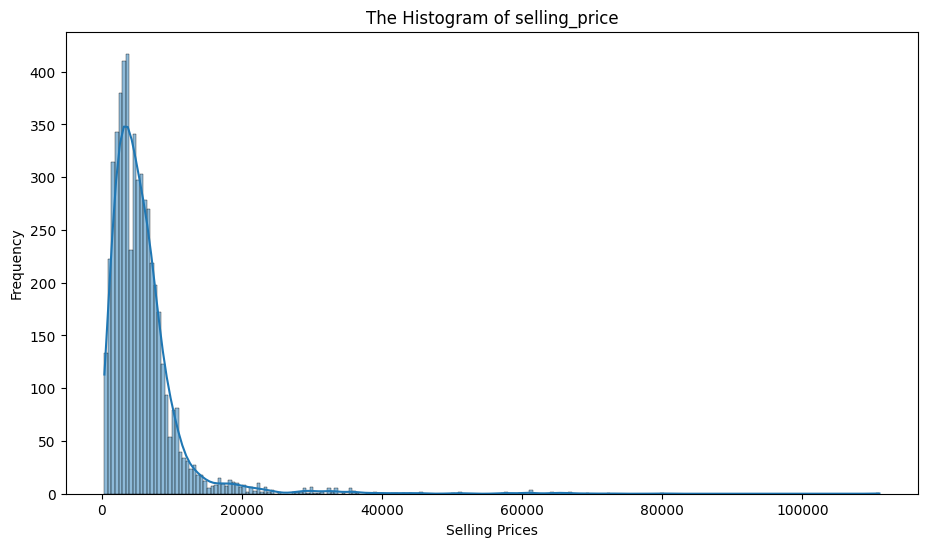

In [16]:
p.figure(figsize=(11, 6))
sns.histplot(data=df_train, x='selling_price', kde=True)
p.title('The Histogram of selling_price')
p.xlabel('Selling Prices')
p.ylabel('Frequency')
p.show()

Here I illustrate the boxplot of the Car Brand and its price range

I can see that Volvo has the highest average selling price comparing the other brands and then its Jaguar and BMW


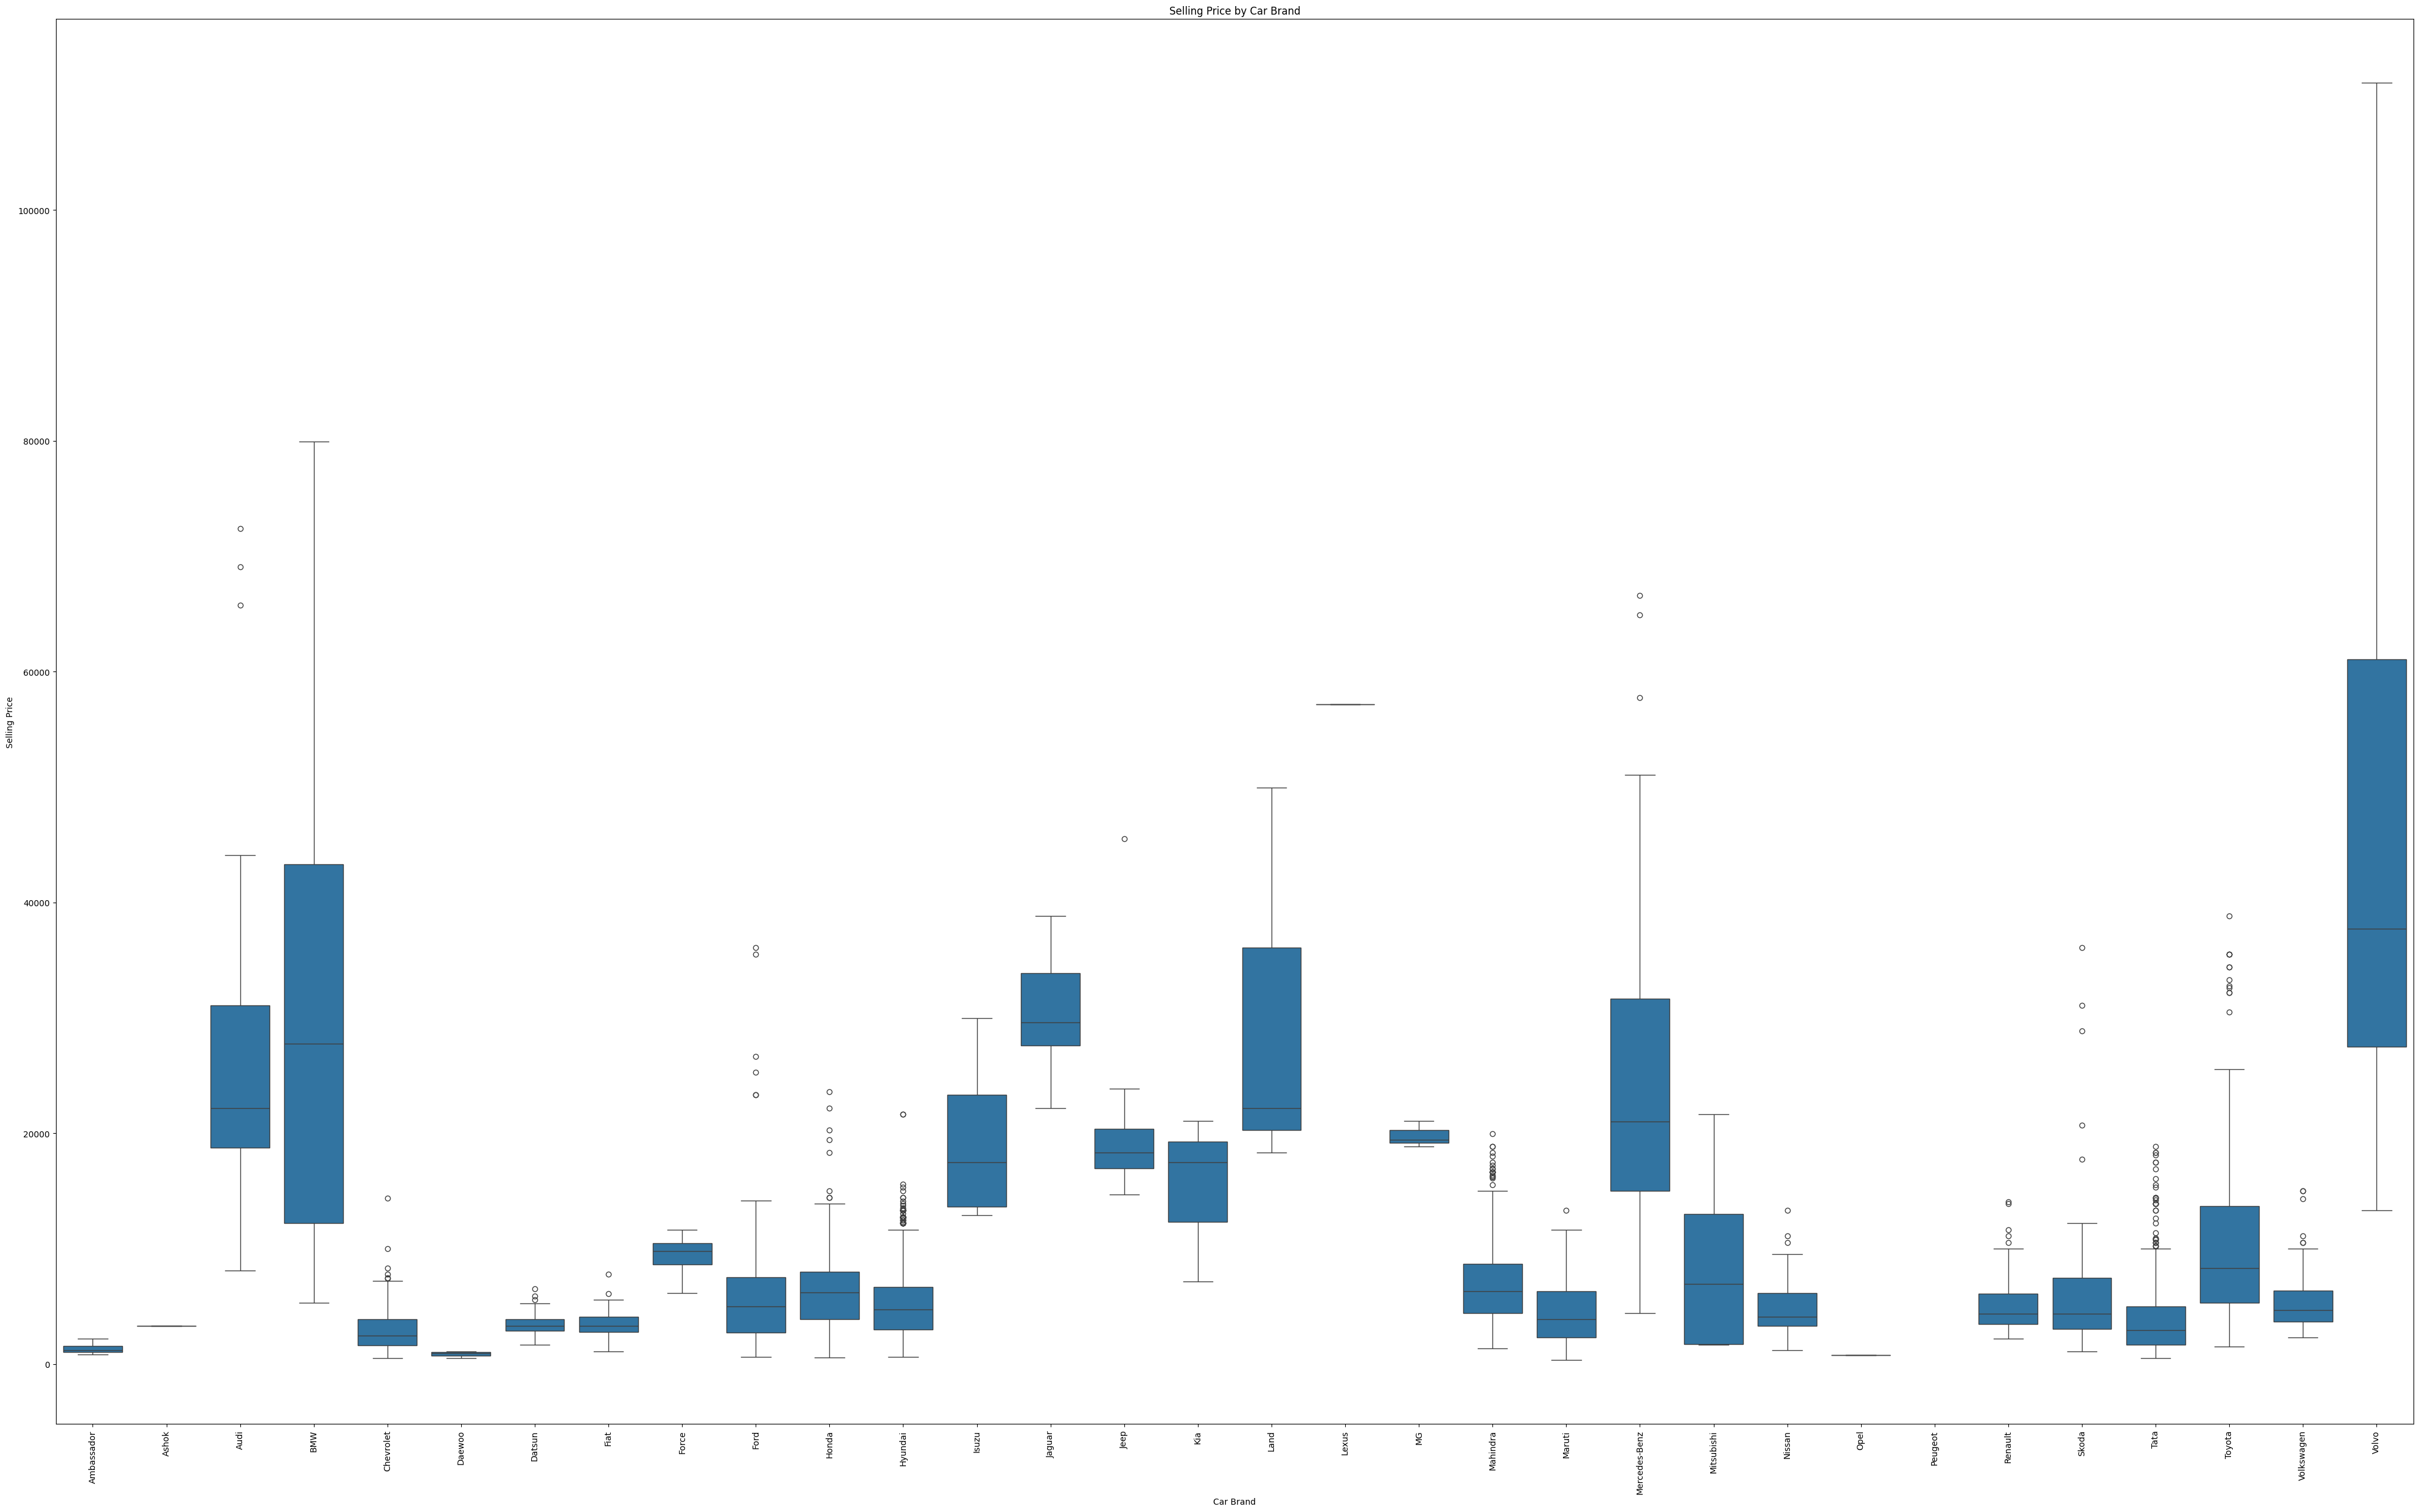

In [17]:
price = df["selling_price"]
brand = df["car_brand_name"]
dff = pd.concat([price, brand], axis=1)
p.figure(figsize=(50, 30))
sns.boxplot(data=dff, x="car_brand_name", y="selling_price")
p.title('Selling Price by Car Brand')
p.xlabel('Car Brand')
p.ylabel('Selling Price')
p.xticks(rotation=90)
p.show()

Here i illustrate the Sale prices of the cars by fuel type




*   diesel and petrol has the most sales comparing to LGP and CNG
*   the sellers are mostly individuals
* the price range for diesel and petrol are higer then  LGP and CNG




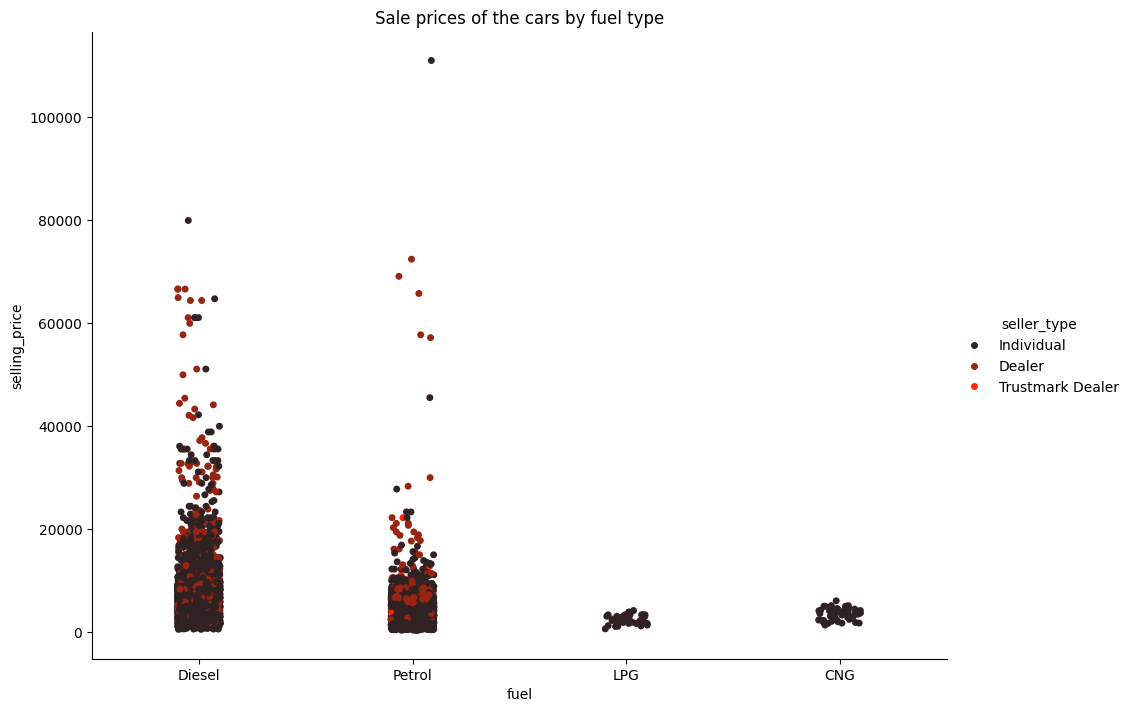

In [18]:
sns.catplot(x="fuel",y="selling_price",kind="strip",hue="seller_type",height=7,aspect=1.4, palette="dark:#FF2701", data=df).set(title="Sale prices of the cars by fuel type");

Here i illustrate the Sale prices of the transmission by the type of the owner


*   the Higher selling prices are mostly from test Drive car
*  automatic transmission has a higher price range then the manual
* fourth or above owner has the least price range for there cars




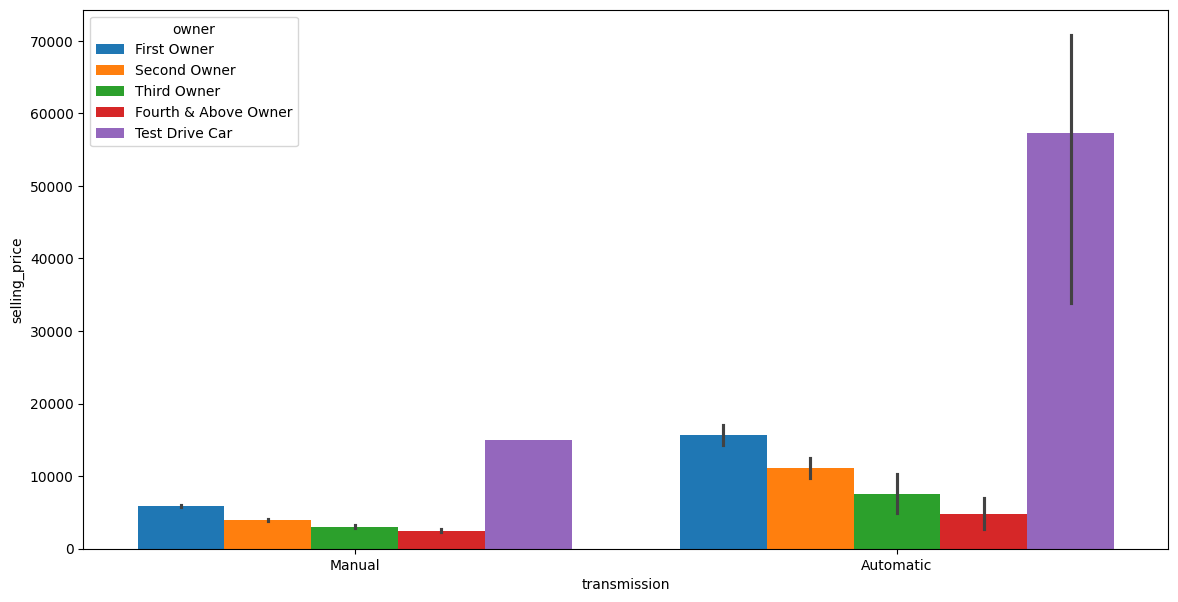

In [19]:
p.figure(figsize = (14, 7))
sns.barplot(x = "transmission", y = "selling_price", hue = "owner", data = df, saturation = 1);

As i can see here, the newest the car is, Usually , the more selling price it is

its not always the case specially with some popular brands like BMW  

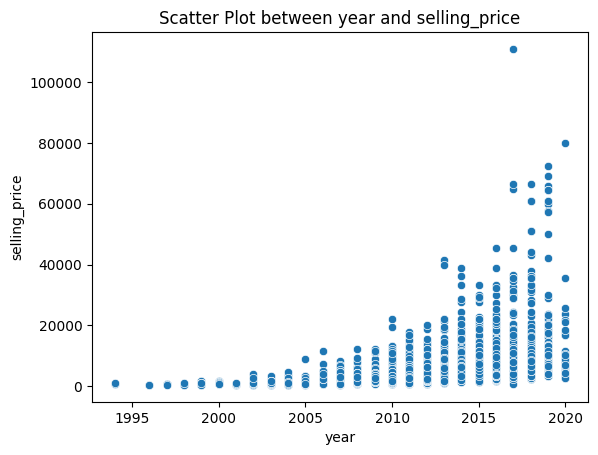

In [20]:
sns.scatterplot(df_train, x='year', y='selling_price')
p.title("Scatter Plot between year and selling_price")
p.show()

In most of the cases, the less KM driven, the more expensive the car will be

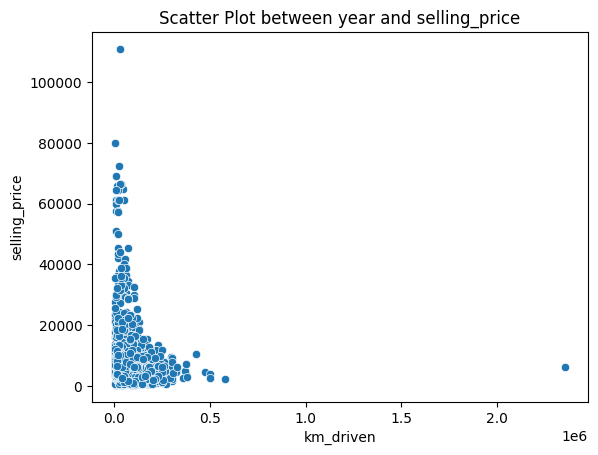

In [21]:
sns.scatterplot(df_train, x='km_driven', y='selling_price')
p.title("Scatter Plot between year and selling_price")
p.show()

# ***FEATURE ENGINEERING***



This code defines a ColumnTransformer named ct which applies standard scaling to numerical attributes and one-hot encoding to categorical attributes


 It fits the transformer on the training data (X_train) and transforms both the training and test data accordingly





In [22]:
numerical_attributes=X_train.select_dtypes(include=["float64","int64"]).columns
categorical_attributes=X_train.select_dtypes(include="object").columns

ct=sklearn.compose.ColumnTransformer([("Standard_scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes), ("One_hot_encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),categorical_attributes)])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)

x_train : (5373, 2209)
x_test : (1344, 2209)


# ***MODEL SELECTION***

We have studied different Algorithms, and here I need to shortlist the ones that fit my dataset

>**Logistic Regression** is a model that typically works with binary classification tasks, not regression problems like our case

>**Naive Bayes** assumes independence among features, which is not the case for this dataset 

>**Support Vector Machines** can be effective but might be overkill for this dataset size

>**k-Nearest Neighbors** is a nonparametric method works with classifications and regressions tasks, but it may not perform well with high dimensional data 


I decided to use those algorithms

>**Decision Trees** is Ideal for handling mixed data types like categorical (e.g., fuel type) and numerical (e.g., year), effectively capturing complex relationships in your dataset to predict the selling price of used cars

>**Linear regression** is great for understanding how factors like year mileage and engine power affect the selling price offering insights into the connections within my data

>**GradientBoostingRegressor** is effective at dealing with relationships and noisy data allowing it to capture the connections between different features, in your dataset accurately for predicting selling prices




# **Model Training**

>This performs a **grid search** over some of hyperparameters for a the 3 models using **GridSearchCV** method

>It evaluates the models based on the **R2 score** with **5-fold cross-validation**

>The best hyperparameters found during the grid search are then printed with the corresponding R^2 score

***1/DecisionTree***

> The best scoring Hyperparameter was as shown below


In [23]:
grid = { "criterion": ["friedman_mse", "poisson"],"min_samples_split": range(2, 20),"max_depth": range(1, 20)}
model1_decision = GridSearchCV(DecisionTreeRegressor(), grid, scoring="r2", cv=5, n_jobs=-1)
model1_decision.fit(X_train, y_train)

print("R^2 score of the best decision tree regressor: {:.2f}".format(model1_decision.best_score_))
print("Best  hyperparameters of decision tree regressor: {}".format(model1_decision.best_params_))

R^2 score of the best decision tree regressor: 0.88
Best  hyperparameters of decision tree regressor: {'criterion': 'poisson', 'max_depth': 12, 'min_samples_split': 5}


***2/Linear Regression***

> The best scoring Hyperparameter was as shown below

In [24]:
grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, -1, 1, 2]    }

model2_linear = GridSearchCV(LinearRegression(), grid, scoring='r2', cv=5, n_jobs=-1)
model2_linear.fit(X_train, y_train)

print("R^2 score of the best Linear Regressions model: {:.3f}".format(model2_linear.best_score_))
print("Best hyperparameter of Linear Regressions model:", model2_linear.best_params_)

R^2 score of the best Linear Regressions model: 0.815
Best hyperparameter of Linear Regressions model: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None}


***3/Gradient Boosting***


> The best scoring Hyperparameter was as shown below


In [25]:
grid = {"n_estimators": [150, 200, 250],"max_depth": [4,5,6],"learning_rate": [0.05, 0.1,0.2]
}
model3_boosting = GridSearchCV( estimator=GradientBoostingRegressor(), param_grid=grid, scoring="r2", cv=5)
model3_boosting.fit(X_train, y_train)

print("R^2 score of the best Gradient Boosting Regressor = {:.2f}".format(model3_boosting.best_score_))
print("Best hyperparameter of Gradient Boosting Regressor = {}".format(model3_boosting.best_params_))

R^2 score of the best Gradient Boosting Regressor = 0.91
Best hyperparameter of Gradient Boosting Regressor = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


# ***Model Assessment***

***Evaluation Of The Final Performance of the Best trained model***

>This of code predicts the outcome variable, in the test dataset by employing the trained Gradient Boosting Regressor model known as model3_boosting


>Afterward it calculates regression metrics like Mean Absolute Error, Root Mean Squared Error,  Mean Squared Error

>R^2 Score is  compared by the predicted value with the actual value, from the test set

In [26]:
y_predicted = model3_boosting.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predicted)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("Mean Absolute Error : {:.2f}".format(mae))
print("Mean Squared Error : {:.2f}".format(mse))
print("R^2 Score: {:.2f}".format(r2))

Root Mean Squared Error: 1318.22
Mean Absolute Error : 807.39
Mean Squared Error : 1737706.32
R^2 Score: 0.94


>The scatter plot illustrates how the real selling prices (y_test) relate to the estimated selling prices (y_predicted)


>In the plot i can see the variations, between predicted values in comparison to the predicted selling prices. An ideal scenario is represented by a line, at y=0, where residuals are evenly spread around zero

>The distribution plot of residuals showcases how the residuals are distributed through a histogram indicating the frequency of values

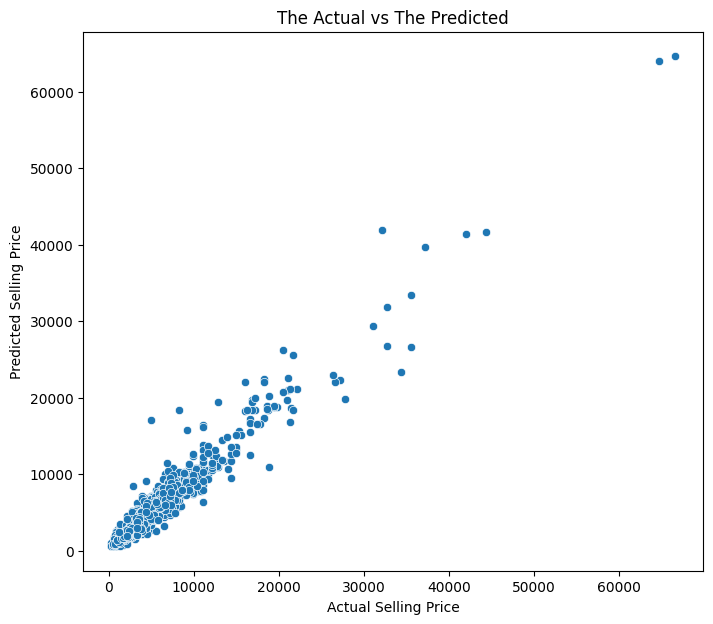

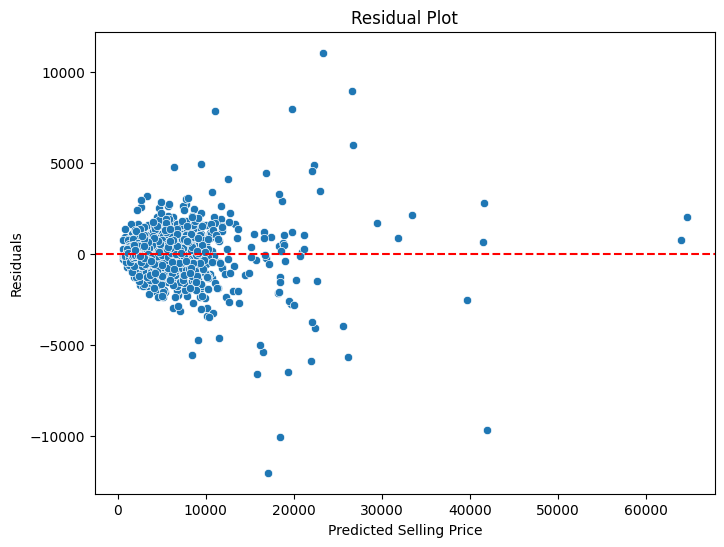

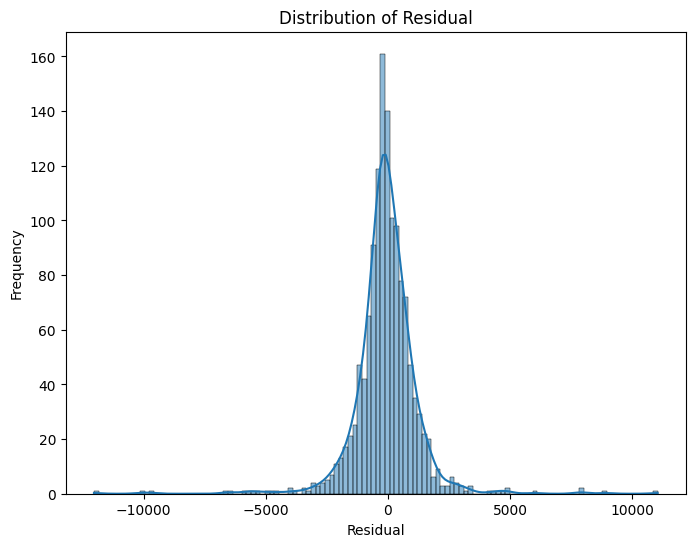

In [27]:
p.figure(figsize=(8, 7))
sns.scatterplot(x=y_test, y=y_predicted)
p.title('The Actual vs The Predicted')
p.xlabel('Actual Selling Price')
p.ylabel('Predicted Selling Price')
p.show()

residuals = y_test - y_predicted
p.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicted, y=residuals)
p.title('Residual Plot')
p.xlabel('Predicted Selling Price')
p.ylabel('Residuals')
p.axhline(y=0, color='r', linestyle='--')
p.show()

p.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
p.title('Distribution of Residual')
p.xlabel('Residual')
p.ylabel('Frequency')
p.show()

# **Conclusion**

**Strengths of the suggested solution:**

>The approach involves handling data cleaning, deleting duplicates addressing missing values and performing Feature Engineering to ensure the quality of the datasets for modeling


>Exploring data analysis provides insights, into how characteristicsre linked to the target variable helping to grasp patterns in the data

>By incorporating techniques such as extracting brand names and scaling attributes the models capabilities are enhanced

>This method include testing machine learning algorithms and selecting the more performer based on cross validation scores leading to a robust and accurate predictive model
>
>The models performance is evaluated using metrics, on both the training and testing sets to confirm its dependability and practicality.



**Challenges of the suggested solution:**

>External factors like conditions, market trends or customer preferences that could impact vehicle prices but are not part of the dataset may not be taken into account by the model

**Business implications of the findings:**

>Accurately predicting vehicle prices enables Cardekho to set prices in line with market trends ultimately resulting in increased revenue generation and enhanced customer satisfaction

>Cardekho benefits from leveraging machine learning models for data driven decision making by using insights, from these models to inform pricing strategies and operational decisions

**Data-driven recommendations for solving the initial business problem:**

>Improving the accuracy and relevance of the model can be achieved by updating it with new data and taking into account feedback from real pricing choices

>To further improve the models abilities and adaptability to evolving market conditions consider integrating factors, like market trends, competitor pricing and economic indicators into the analysis